<a href="https://colab.research.google.com/github/muhammadalfateh6/Skin-lesion-Classification-Deep-learning/blob/main/Xception%20Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.preprocessing.image import ImageDataGenerator

vgg_model = tf.keras.applications.Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in vgg_model.layers:
    layer.trainable = False

train_directory = '/content/drive/MyDrive/Gen Set'
test_directory = '/content/drive/MyDrive/Gen Set Test'

train_path = '/content/drive/MyDrive/Gen Set'
Benign_class = '/content/drive/MyDrive/Gen Set/Benign'
Malignant_class = '/content/drive/MyDrive/Gen Set/Malignant'

test_path = '/content/drive/MyDrive/Gen Set Test'
Benign_class_test = '/content/drive/MyDrive/Gen Set Test/Benign Test'
Malignant_class_test = '/content/drive/MyDrive/Gen Set Test/Malignant Test'

# Use ImageDataGenerator to load images from the train, validation, and test directories
data_generator = ImageDataGenerator(rescale=1./255)

train_data = data_generator.flow_from_directory(train_directory,
                                                 target_size=(224, 224),
                                                 batch_size=32,
                                                 class_mode='binary',
                                                 classes=['Benign', 'Malignant'],
                                                 shuffle=True,
                                                 save_to_dir=train_path,
                                                 save_format='bmp')

test_data = data_generator.flow_from_directory(test_directory,
                                                target_size=(224, 224),
                                                batch_size=32,
                                                class_mode='binary',
                                                classes=['Benign', 'Malignant'],
                                                shuffle=False,
                                                save_to_dir=test_path,
                                                save_format='bmp')

class calls(Callback):
    def on_train_begin(self, logs=None):
        print("training started")
    def on_epoch_begin(self, epoch, logs=None):
        print(f"Starting epoch number {epoch}")
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch number {epoch} ended")              
    def on_train_end(self, logs=None):
        print("Training ended for good")

calling =[calls()]

model = tf.keras.models.Sequential([
        vgg_model,
        tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2), padding='same'),
        tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2), padding='same'),
        tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2), padding='same'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

80134624/80134624 [==============================] - 1s 0us/step
Found 311 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


In [ ]:
history = model.fit(train_data,
                    callbacks = calling,
                    epochs = 2,
                    batch_size = 32,
                    validation_data = (test_data),
                    verbose = 1)

training started
Starting epoch number 0
Epoch 1/2
10/10 [==============================] - 242s 23s/step - loss: 0.0012 - accuracy: 1.0000
Starting epoch number 1
Epoch 2/2
10/10 [==============================] - 230s 23s/step - loss: 0.0017 - accuracy: 1.0000
Training ended for good


KeyError: ignored

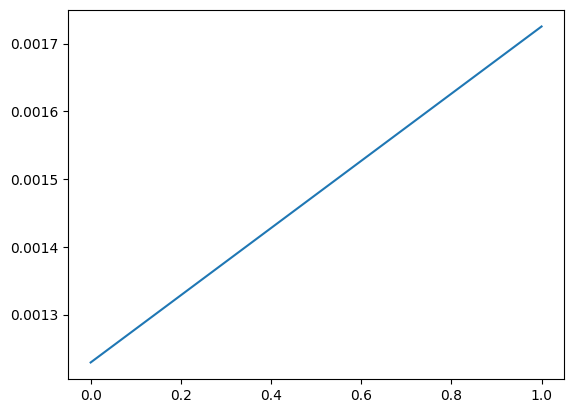

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs epochs')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training', 'Validation'], loc='upper right')
print('\n')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy vs. Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show() 